In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r'file:///F:\heart%20disease%20data.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

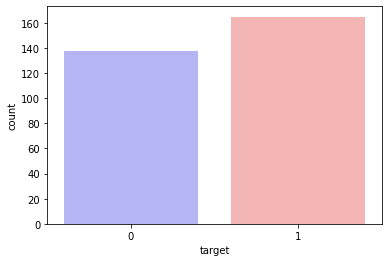

In [5]:
sns.countplot(x="target",data=df,palette='bwr')
plt.show()

In [6]:
CountNoDisease=len(df[df.target==0])
CountHaveDisease=len(df[df.target==1])

In [7]:
print("No Heart Diease %:{:.2f}%".format((CountNoDisease/(len(df.target))*100)))

No Heart Diease %:45.54%


In [8]:
print("No Heart Diease %:{:.2f}%".format((CountHaveDisease/(len(df.target))*100)))

No Heart Diease %:54.46%


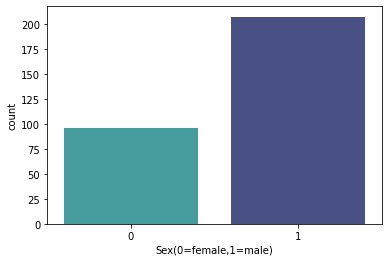

In [9]:
sns.countplot(x='sex',data=df,palette="mako_r")
plt.xlabel("Sex(0=female,1=male)")
plt.show()

In [11]:
print("No Heart Diease %:{:.2f}%".format((CountFemale/(len(df.target))*100)))

No Heart Diease %:31.68%


In [12]:
print("No Heart Diease %:{:.2f}%".format((CountMale/(len(df.target))*100)))

No Heart Diease %:68.32%


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


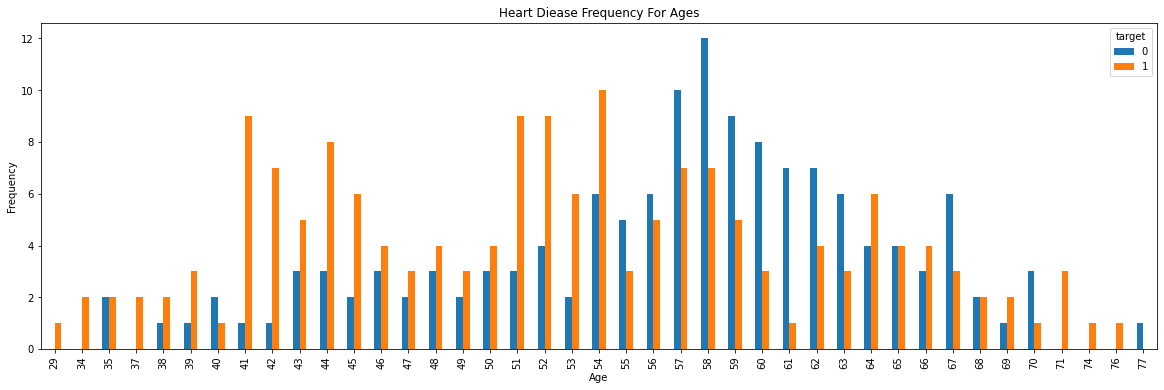

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Diease Frequency For Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDieaseAndAges.png')
plt.show()

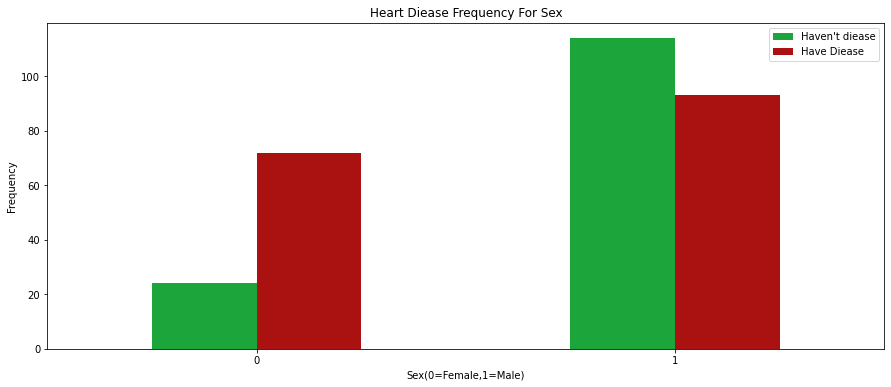

In [15]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title("Heart Diease Frequency For Sex")
plt.xlabel('Sex(0=Female,1=Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't diease","Have Diease"])
plt.ylabel('Frequency')
plt.savefig('heartDieaseAndSex.png')
plt.show()

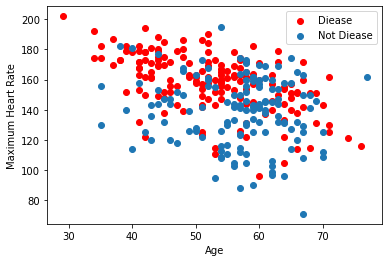

In [16]:
plt.scatter(x=df.age[df.target==1],y=df.thalach[(df.target==1)],c="red")
plt.scatter(x=df.age[df.target==0],y=df.thalach[(df.target==0)])
plt.legend(["Diease","Not Diease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

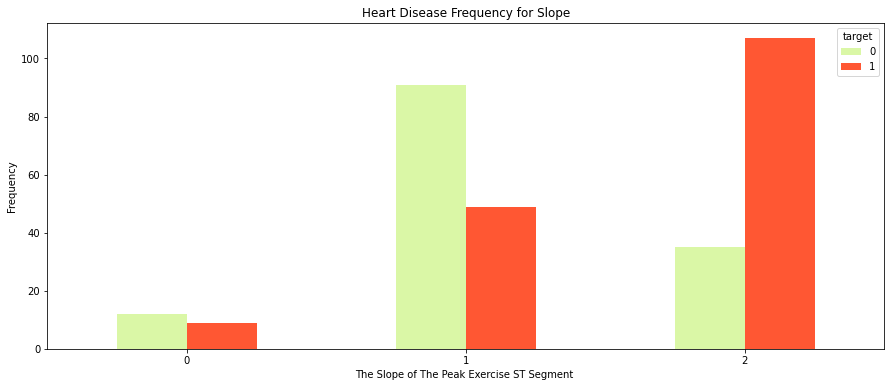

In [17]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

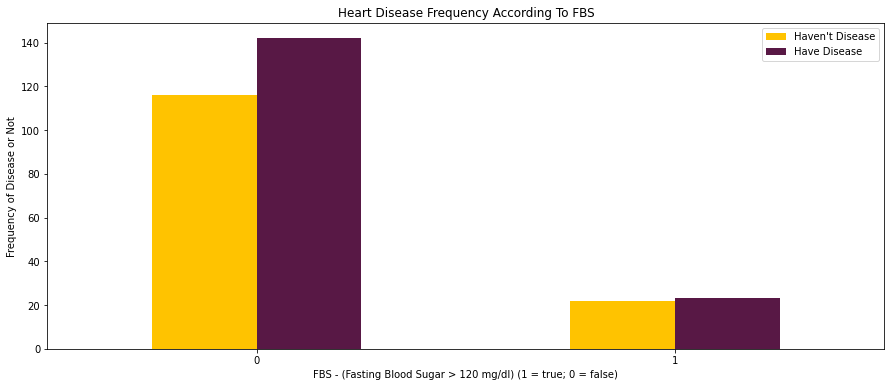

In [18]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

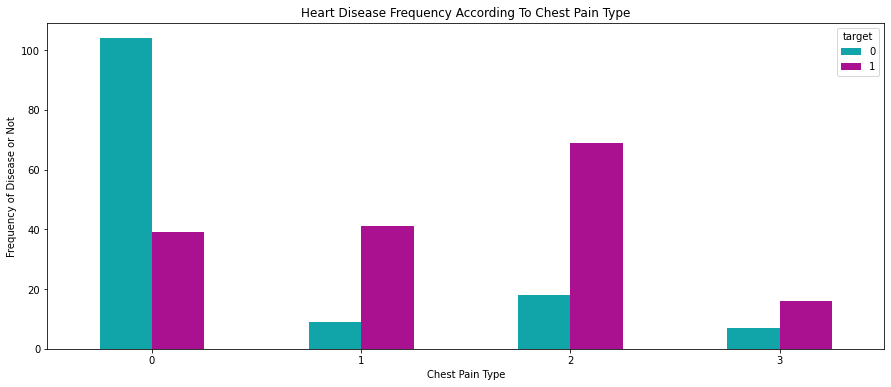

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [20]:
a=pd.get_dummies(df['cp'],prefix="cp")
b=pd.get_dummies(df['thal'],prefix="cp")
c=pd.get_dummies(df['slope'],prefix="cp")

In [21]:
frames=[df,a,b,c]
df=pd.concat(frames,axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,cp_0,cp_1,cp_2,cp_3,cp_0,cp_1,cp_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [22]:
df=df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,cp_0,cp_1,cp_2,cp_3,cp_0,cp_1,cp_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [23]:
y=df.target.values
x_data=df.drop(['target'],axis=1)

In [24]:
#Normalize(x-x(min)/x(max)-x(min))attempt to convert your data to normal dist
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
accuracies={}

In [27]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(x_train, y_train)
acc = regr.score(x_test,y_test)*100
accuracies['Logistic Regression']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


In [28]:
y_pred = regr.predict(x_test)

In [29]:
regr.intercept_

array([2.00446635])

In [30]:
regr.coef_

array([[-0.43070954, -1.16977707, -0.6112529 , -0.47932688, -0.21428371,
         0.2278796 ,  0.93186377, -0.68653273, -1.18503902, -2.25020838,
        -1.01378046,  0.07384474,  0.54051507,  0.39955073, -0.10366469,
         0.00681359,  0.72008259, -0.62310141,  0.09715387, -0.40183921,
         0.30481542]])

In [31]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
acc = classifier.score(x_test,y_test)*100
accuracies['Decision Tree']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 77.05%


In [32]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=19,criterion='entropy',random_state=0)
classifier1.fit(x_train,y_train)
#Predicting the Test ser results
y_pred=classifier1.predict(x_test)
acc = classifier1.score(x_test,y_test)*100
accuracies['Random Forest']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


In [39]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
acc=svm.score(x_test,y_test)*100
accuracies['SVM']=acc
print("Test Accuracy of SVM Algorithm {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm 88.52%


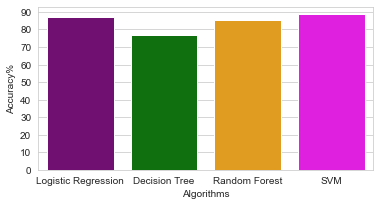

In [40]:
colors=["purple","green","orange","magenta","yellow"]
sns.set_style("whitegrid")
plt.figure(figsize=(6,3))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy%")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colors)
plt.show()

In [42]:
#Predicted values
pred_lr =regr.predict(x_test)
pred_dtc=classifier.predict(x_test)
pred_rf=classifier1.predict(x_test)
pred_svm=svm.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [43]:
cm_lr=confusion_matrix(y_test,pred_lr)
cm_dtc=confusion_matrix(y_test,pred_dtc)
cm_rf=confusion_matrix(y_test,pred_rf)
cm_svm=confusion_matrix(y_test,pred_svm)

<AxesSubplot:title={'center':'Support Vector Machine'}>

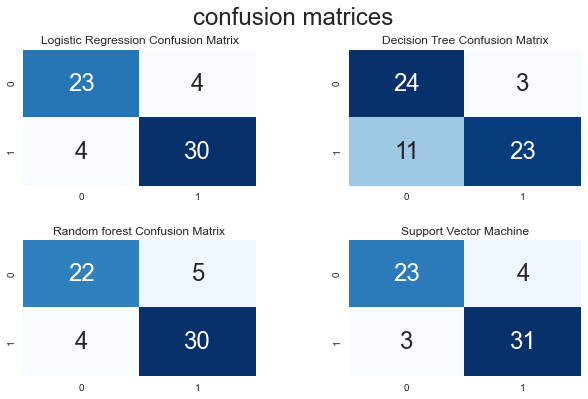

In [45]:
plt.figure(figsize=(10,6))

plt.suptitle("confusion matrices",fontsize=24)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

plt.subplot(2,2,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

plt.subplot(2,2,3)
plt.title("Random forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})

plt.subplot(2,2,4)
plt.title("Support Vector Machine")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False,annot_kws={"size":24})